In [10]:
%pylab inline
from astropy import units
from astropy import constants

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [11]:
# From the analytic aprox of Zentner & Bullock 2003 for a NFW profile/
G = constants.G

def los_vdisp_NFW(c, r, M, Rv):
    M = M * units.Msun
    Rv = Rv * units.kpc
    vvir = np.sqrt(G * M / Rv)
    g = np.log(1+c) - (c /(1+c))
    vmax = np.sqrt(0.216 * vvir**2 * c / g)
    x = r / Rv.value * c
    sigma = vmax * 1.4393 * x **(0.354) / (1.0 + 1.1756*x**0.725)
    sigma = sigma.to(units.kpc / units.Gyr)
    return sigma

In [92]:
gamma = 1.0

def X(s):
    x = np.zeros(len(s))
    for i in range(len(s)):
        if s[i]<1:
            x[i] = 1.0 / np.sqrt((1.0-s[i]**2.0))*log((1.0 + np.sqrt(1.0-s[i]**2.0))/s[i])
        elif s[i]>1:
            x[i] = 1.0 / np.sqrt(s[i]**2.0-1.0) *cos(1.0/s[i])**(-1.0)
        elif s[i]==1.0:
            x[i]=1.0
    return x

def surface_b(M, a, r):
    s = (r/a)
    x = X(s)
    a = a * units.kpc
    r = a * units.kpc
    M = M * units.Msun
    I = M/(2*np.pi*a**2*gamma*(1.0-s**2.0)**2.0) * ((2.0+s**2.0)*x-3.0)
    index = np.where(s==1)[0]
    I[index] = 2*M/(15*np.pi*a**2.0*gamma)
    return I

def los_vdisp_H(M, a, r):
    s = r/a
    x = X(s)
    r = r * units.kpc
    a = a * units.kpc
    M = M * units.Msun
    I = surface_b(M.value, a.value, r.value)
    constants = G*M**2.0 / (12.0*np.pi*a**3.0*gamma*I)
    factor = 1.0/(2.0*(1.0-s**2.0)**(3.0))
    sigma2 = constants*(factor*((-3*s**2.0*x)*(8*s**6.0 - 28.0*s**4.0 + 35.0*s**2.0- 20.0)\
                                - 24.0*s**6.0 + 68.0*s**4.0 - 65.0*s**2.0 + 6.0) - 6*np.pi*s)
    sigma = np.sqrt(sigma2)
    sigma = sigma.to(units.kpc/units.Gyr)
    return sigma

In [59]:
#r = linspace(0.1, 300, 220)
sigma_H = los_vdisp_H(1.55E12, 40.0, r)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in sqrt


In [60]:
sigma_NFW = los_vdisp_NFW(15, r, 1.2E12, 278.0)

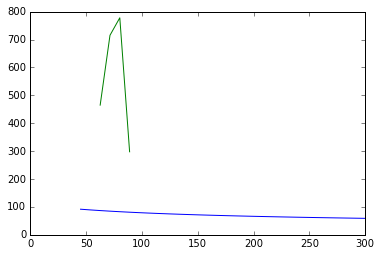

In [63]:
plot(r, sigma_NFW)
plot(r, sigma_H)
#ylim(0, 130)

[ 0.65788713]


(0, 3.1)

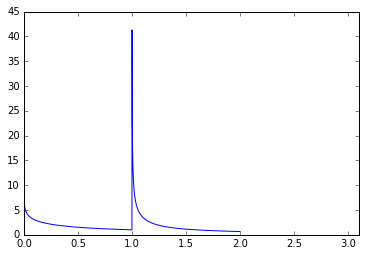

In [64]:
ss = linspace(0.001, 2, 2000)
xx = X(ss)
print X(np.ones(1)*2)
plot(ss, xx)
xlim(0, 3.1)

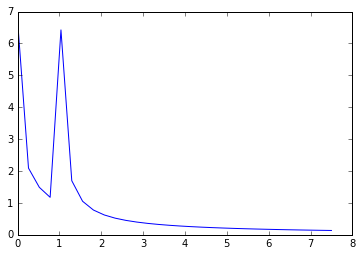

In [68]:
r = linspace(0.1, 300, 30)
s = r/40.

plot(s, X(s))

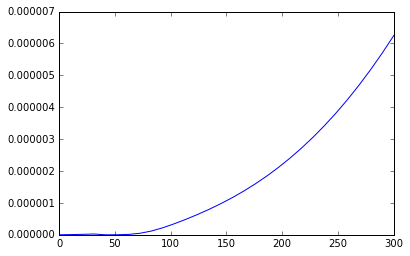

In [79]:
plot(r, 1/surface_b(1E12, 40., r))

In [90]:
def n_function(s):
    x = X(s)
    factor = 1.0/(2.0*(1.0-s**2.0)**(3.0))
    ii = 1/surface_b(1E12, 40, r).value
    sigma2 = r**2.0*ii*(factor*((-3*s**2.0*x)*(8*s**6.0 - 28.0*s**4.0 + 35.0*s**2.0- 20.0)\
                - 24.0*s**6.0 + 68.0*s**4.0 - 65.0*s**2.0 + 6.0) - 6*np.pi*s)
    return sigma2

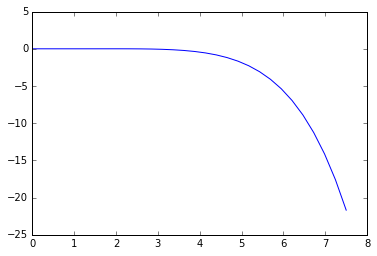

In [91]:
plot(s, n_function(s))